In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("/Users/aoliveira/Documents/FACULDADE - cópia/1 ANO/2 SEMESTRE/Elementos de IA e CD/projeto 2/hcc_dataset.csv", sep=",")
df

# 1. Número de Fatores Analisados e Doentes

num_fatores_analisados = df.shape[1]
num_doentes = df.shape[0]
print(f"1. Número de Fatores Analisados: {num_fatores_analisados}")
print(f"   Número de Doentes: {num_doentes}\n")

# 2. Lista de Fatores Analisados

print("2. Lista de Fatores Analisados:")
lista_colunas = []
for coluna in df.columns:
    lista_colunas.append(coluna)
print(lista_colunas)

# 3. Tipos de Fatores Analisados

print("\n3. Tipos de Fatores Analisados:")
print(df.dtypes)

# 4. Distribuição das Classes (se houver)

if 'classe' in df.columns:
    print("\n4. Distribuição das Classes:")
    print(df['classe'].value_counts())

# 5. Valores Ausentes

# Contagem de valores ausentes em cada coluna
valores_ausentes = (df == '?').sum()
# Exibir a contagem de valores ausentes em cada coluna
print("\n5. Valores Ausentes:")
for coluna, valor in valores_ausentes.items():
    print(f"{coluna.strip()}: {valor}")

# 6. Doentes que irão morrer

# Criar um dicionário vazio para armazenar todos os dados dos pacientes que morreram
DADOS_PACIENTES_MORREM = {}

# Criar um dicionário para armazenar os dados dos pacientes com 'Class' igual a 'Dies'
dados_dies = {}

# Iterar sobre as linhas do DataFrame
for indice, linha in df.iterrows():
    # Verificar se a coluna 'Class' contém o valor 'Dies'
    if linha['Class'] == 'Dies':
        # Se sim, adicionar o número do paciente e suas características ao dicionário
        dados_dies[indice + 1] = linha[:-1].to_dict()  # índice começa em 0, então adicionamos 1
        
# Iterar sobre os pacientes que morreram e adicionar ao dicionário        
for indice, dados in dados_dies.items():
    DADOS_PACIENTES_MORREM[indice] = dados

# Exibir o dicionário de pacientes que morreram
print("6. DADOS_PACIENTES_MORREM:")
print('\n')

for doente, valores in DADOS_PACIENTES_MORREM.items():
    print(f'{doente}: {valores}')
    print('\n')


1. Número de Fatores Analisados: 50
   Número de Doentes: 165

2. Lista de Fatores Analisados:
['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin', 'Class']

3. Tipos de Fatores Analisados:
Gender            object
Symptoms          object
Alcohol           object
HBsAg             object
HBeAg             object
HBcAb             object
HCVAb             object
Cirrhosis         object
Endemic           object
Smoking           object
Diabetes          object
Obesity           object
Hemochro          object
AHT               object
CRI              

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("/Users/aoliveira/Documents/FACULDADE - cópia/1 ANO/2 SEMESTRE/Elementos de IA e CD/projeto 2/hcc_dataset.csv", sep=",")
df


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,Dies


In [14]:
# 1. Número de Fatores Analisados e Doentes

num_fatores_analisados = df.shape[1]
num_doentes = df.shape[0]

print(f"1. Número de Fatores Analisados: {num_fatores_analisados}")
print(f"   Número de Doentes: {num_doentes}\n")

1. Número de Fatores Analisados: 50
   Número de Doentes: 165



In [15]:
# 2. Lista de Fatores Analisados

print("2. Lista de Fatores Analisados:")
lista_colunas = []
for coluna in df.columns:
    lista_colunas.append(coluna)

print(lista_colunas)

2. Lista de Fatores Analisados:
['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin', 'Class']


In [16]:
# 3. Tipos de Fatores Analisados

colunas = df.columns

# Iterar sobre cada coluna
for coluna in colunas:
    df[coluna] = df[coluna].replace('?', np.nan)
    # Converter para tipo numérico se possível
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')

# Imprimir os tipos de dados das colunas
print("\n3. Tipos de Fatores Analisados:")
print(df.dtypes)


3. Tipos de Fatores Analisados:
Gender             object
Symptoms           object
Alcohol            object
HBsAg              object
HBeAg              object
HBcAb              object
HCVAb              object
Cirrhosis          object
Endemic            object
Smoking            object
Diabetes           object
Obesity            object
Hemochro           object
AHT                object
CRI                object
HIV                object
NASH               object
Varices            object
Spleno             object
PHT                object
PVT                object
Metastasis         object
Hallmark           object
Age                 int64
Grams_day         float64
Packs_year        float64
PS                 object
Encephalopathy     object
Ascites            object
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
 Albumin          float64
Total_Bil         float64
ALT  

/var/folders/3m/zr5rzzks013dxbsppmvcmcdw0000gp/T/ipykernel_27478/888379441.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[coluna] = pd.to_numeric(df[coluna], errors='ignore')


In [24]:
# Calcula o tipo de cada variável
tipos = df.dtypes

# Calcula o número de valores NaN em cada coluna
num_nan = df.isna().sum()

# Calcula a porcentagem de valores NaN em relação ao total em cada coluna
porcentagem_nan = (num_nan / len(df)) * 100

# Formata a porcentagem com duas casas decimais
porcentagem_nan_formatada = porcentagem_nan.apply(lambda x: f"{x:.2f}%")

# Cria um novo DataFrame para armazenar as estatísticas
tabela_estatisticas = pd.DataFrame({
    'Tipo': tipos,
    'Média': '-',
    'Desvio_Padrão (%)': '-',
    'NaN': num_nan,
    'NaN (%)': porcentagem_nan_formatada
})

# Calcula a média e o desvio padrão apenas para colunas numéricas
colunas_numericas = df.select_dtypes(include=[np.number]).columns
for coluna in colunas_numericas:
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    if not np.isnan(media):
        tabela_estatisticas.at[coluna, 'Média'] = f"{media:.2f}"
    if not np.isnan(desvio_padrao):
        tabela_estatisticas.at[coluna, 'Desvio_Padrão (%)'] = f"{(desvio_padrao / media) * 100:.2f}%"

# Exibe a tabela de estatísticas de forma simples (sem depender de Jinja2)
print("\nTabela de Estatísticas:")
print(tabela_estatisticas.to_string(index=True))


Tabela de Estatísticas:
                   Tipo      Média Desvio_Padrão (%)  NaN NaN (%)
Gender           object          -                 -    0   0.00%
Symptoms         object          -                 -   18  10.91%
Alcohol          object          -                 -    0   0.00%
HBsAg            object          -                 -   17  10.30%
HBeAg            object          -                 -   39  23.64%
HBcAb            object          -                 -   24  14.55%
HCVAb            object          -                 -    9   5.45%
Cirrhosis        object          -                 -    0   0.00%
Endemic          object          -                 -   39  23.64%
Smoking          object          -                 -   41  24.85%
Diabetes         object          -                 -    3   1.82%
Obesity          object          -                 -   10   6.06%
Hemochro         object          -                 -   23  13.94%
AHT              object          -                 

In [25]:
# 5. Valores Ausentes

# Contagem de valores ausentes em cada coluna
valores_ausentes = df.isna().sum()


# Exibir a contagem de valores ausentes em cada coluna
print("\n5. Valores Ausentes:")
for coluna, valor in valores_ausentes.items():
    print(f"{coluna.strip()}: {valor}")


5. Valores Ausentes:
Gender: 0
Symptoms: 18
Alcohol: 0
HBsAg: 17
HBeAg: 39
HBcAb: 24
HCVAb: 9
Cirrhosis: 0
Endemic: 39
Smoking: 41
Diabetes: 3
Obesity: 10
Hemochro: 23
AHT: 3
CRI: 2
HIV: 14
NASH: 22
Varices: 52
Spleno: 15
PHT: 11
PVT: 3
Metastasis: 4
Hallmark: 2
Age: 0
Grams_day: 48
Packs_year: 53
PS: 0
Encephalopathy: 143
Ascites: 111
INR: 4
AFP: 8
Hemoglobin: 3
MCV: 3
Leucocytes: 3
Platelets: 3
Albumin: 6
Total_Bil: 5
ALT: 4
AST: 3
GGT: 3
ALP: 3
TP: 11
Creatinine: 7
Nodules: 2
Major_Dim: 20
Dir_Bil: 44
Iron: 79
Sat: 80
Ferritin: 80
Class: 0


6. Histogramas dos Pacientes:




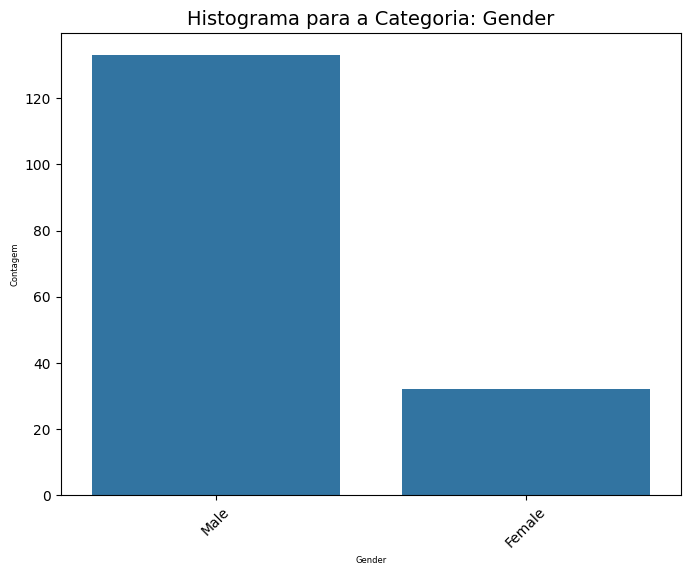

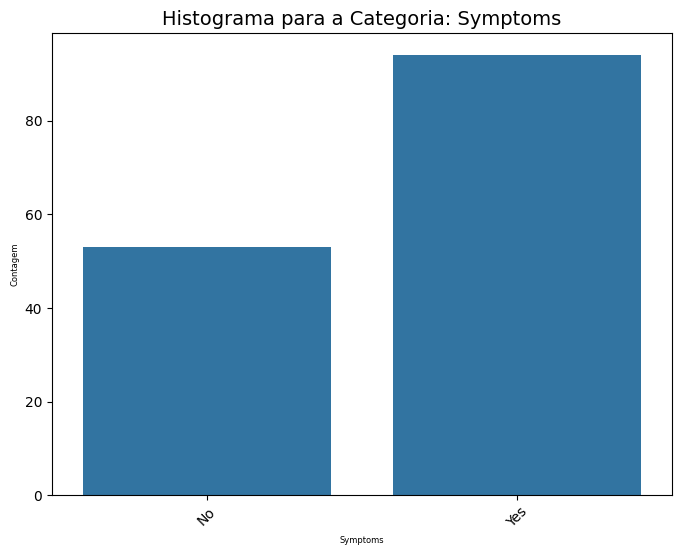

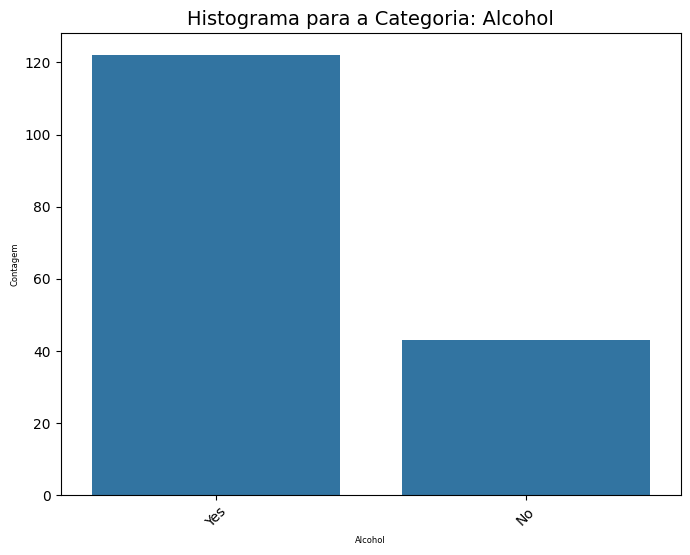

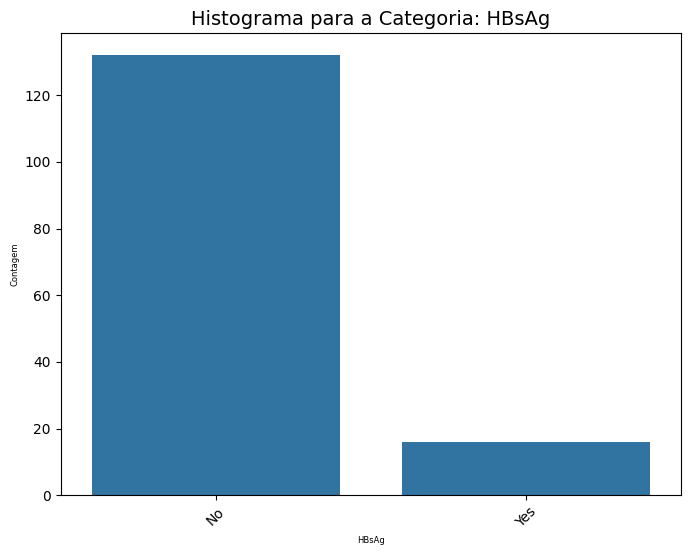

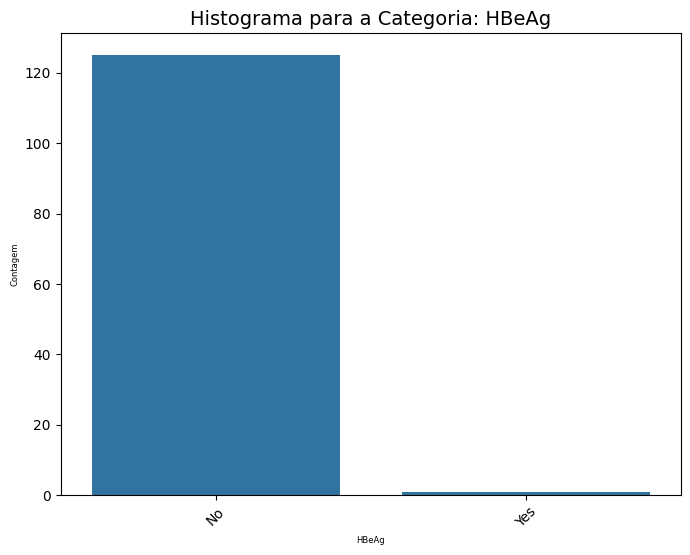

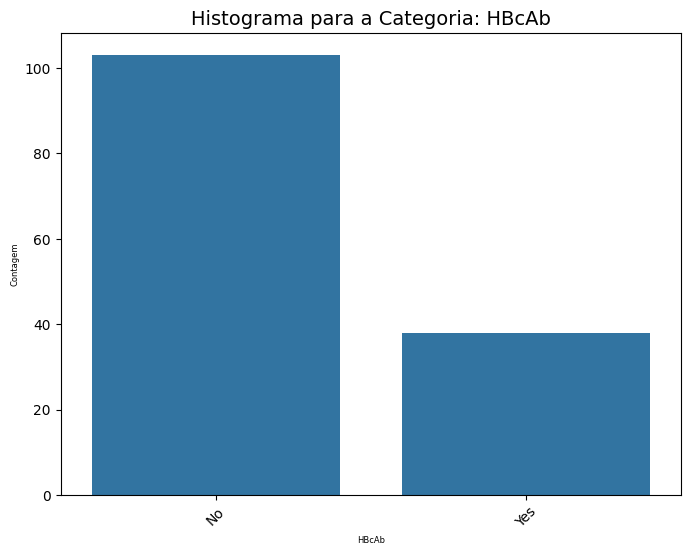

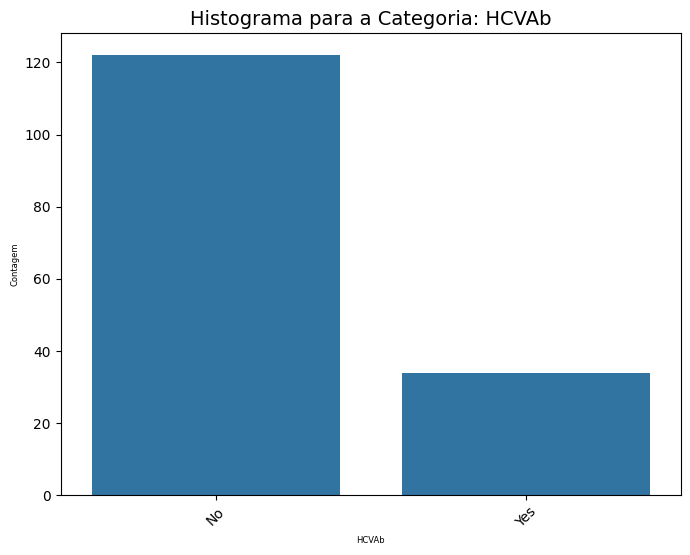

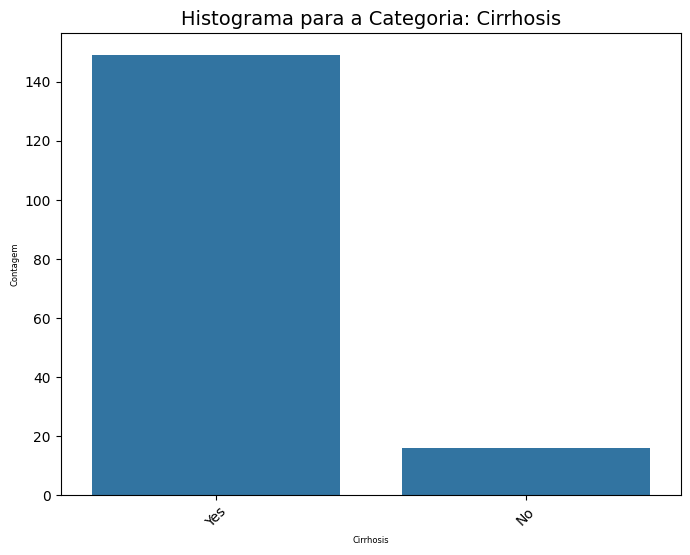

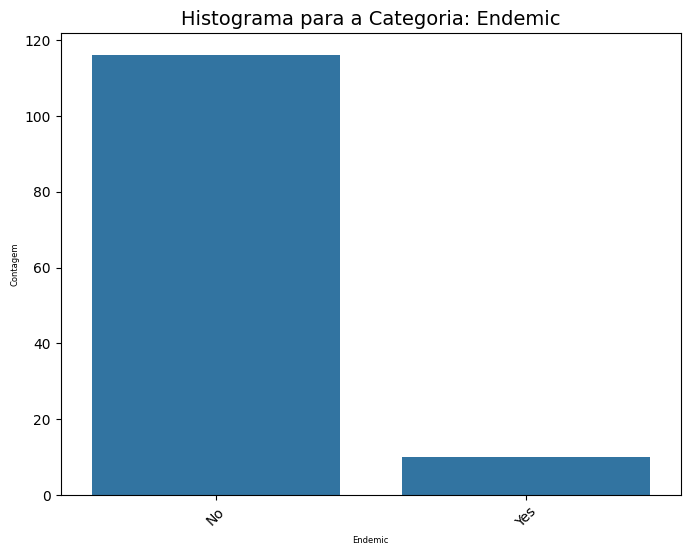

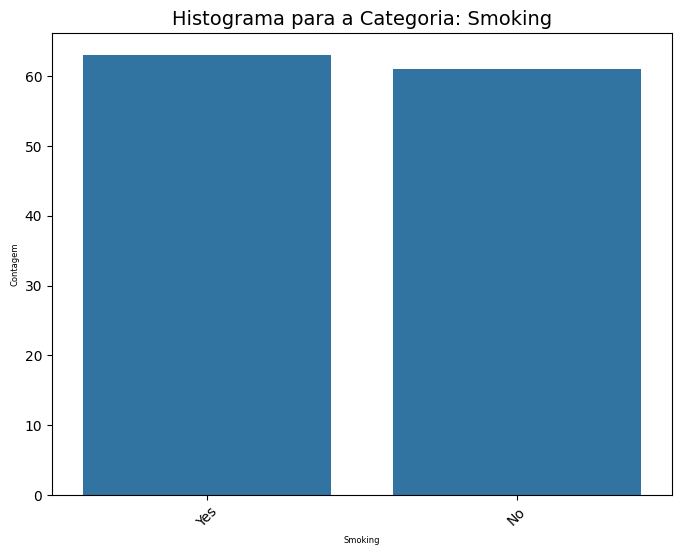

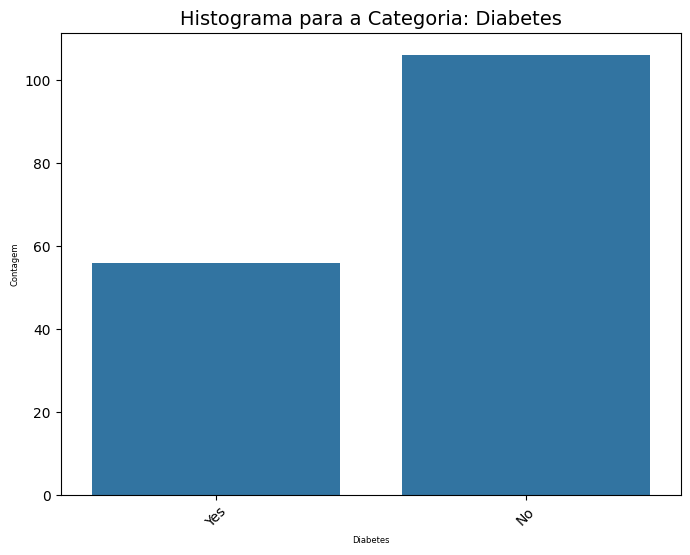

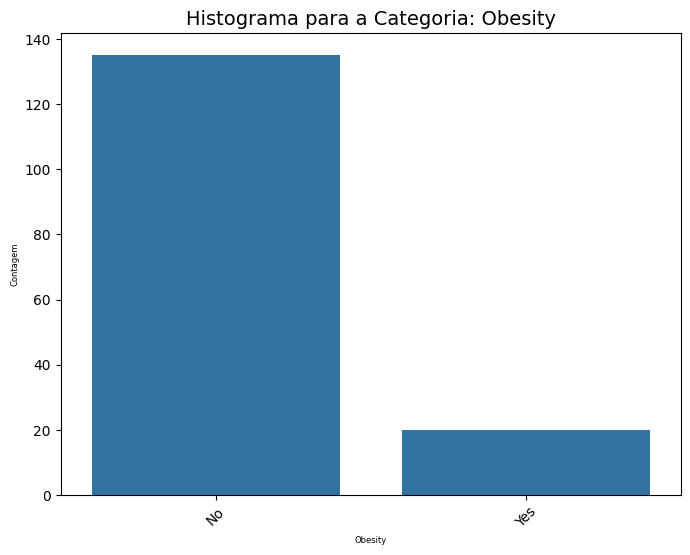

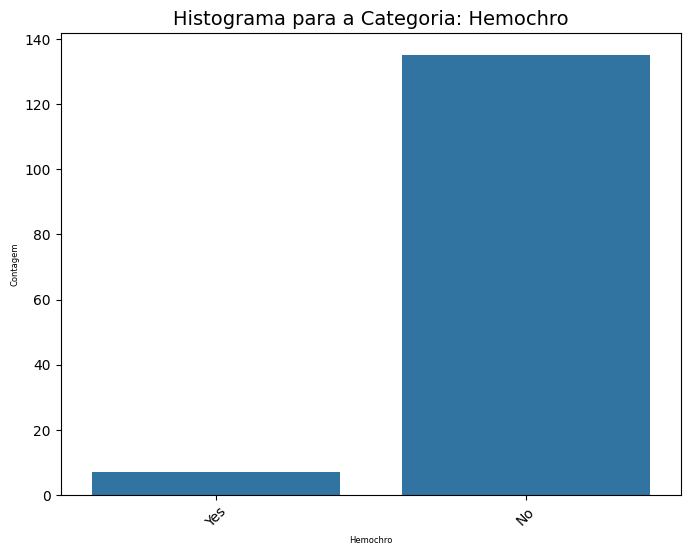

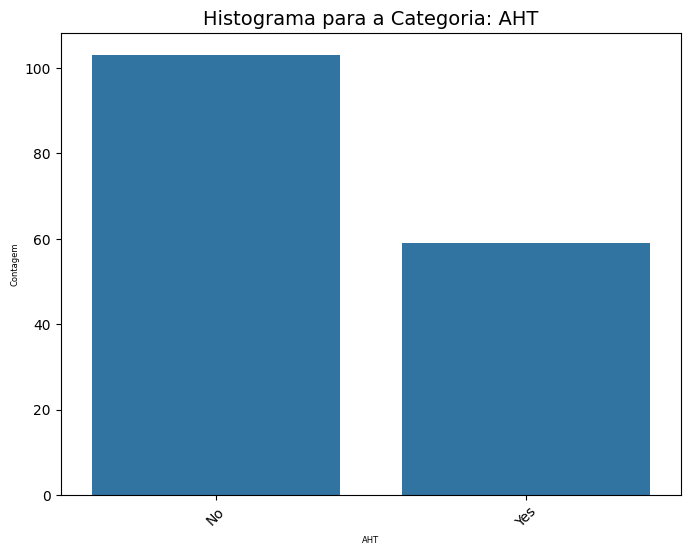

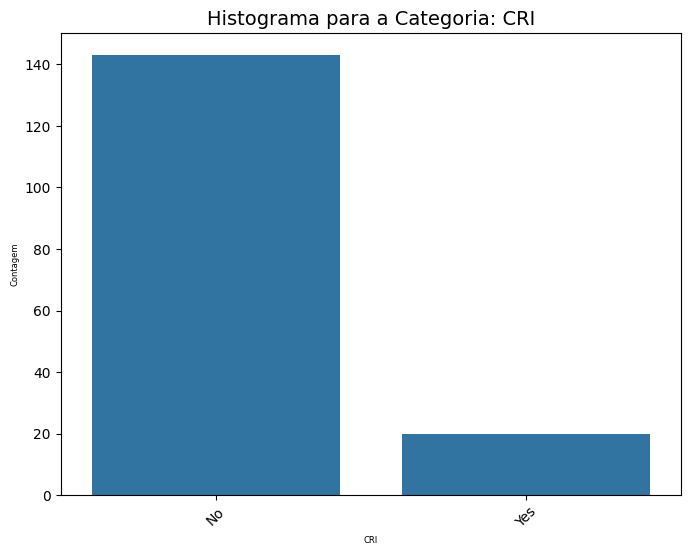

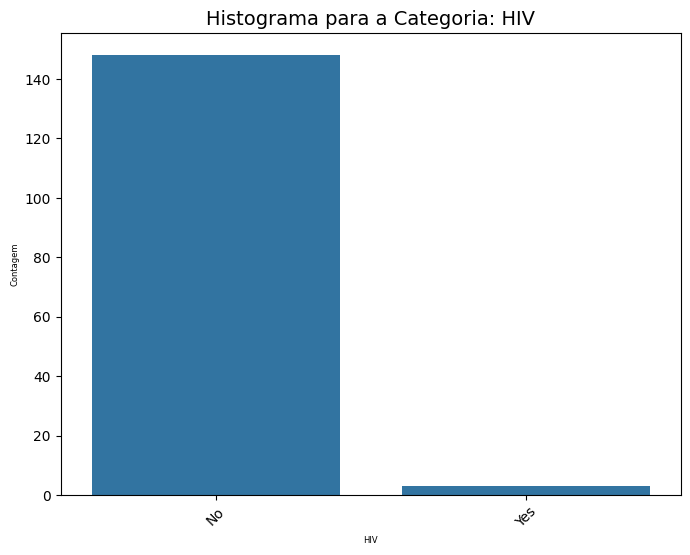

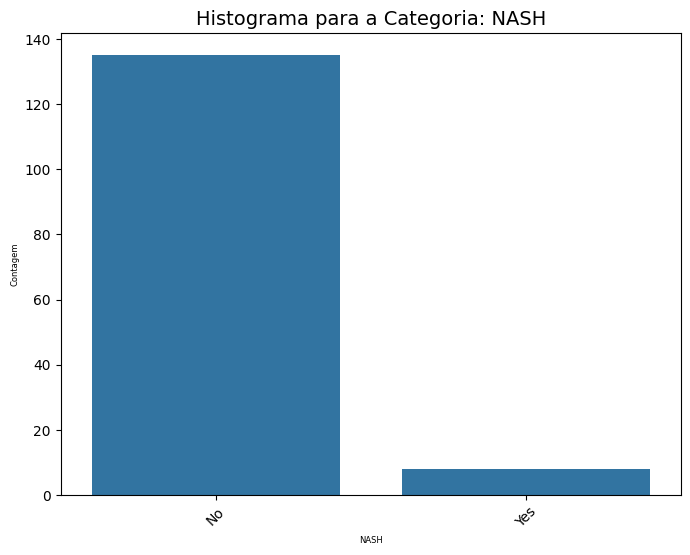

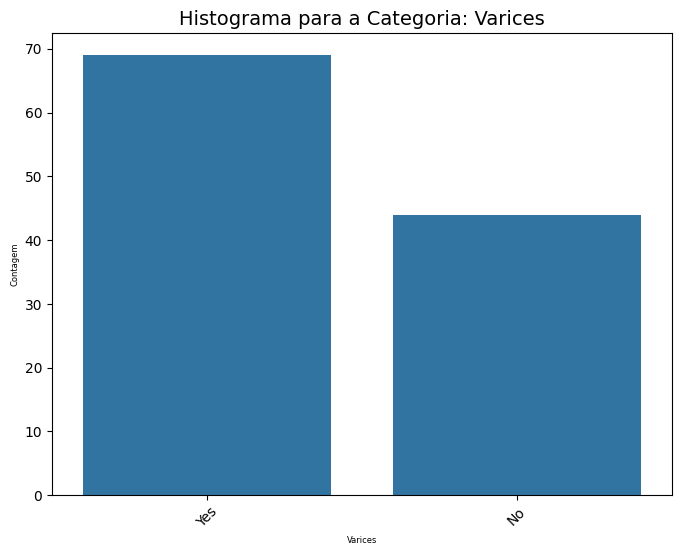

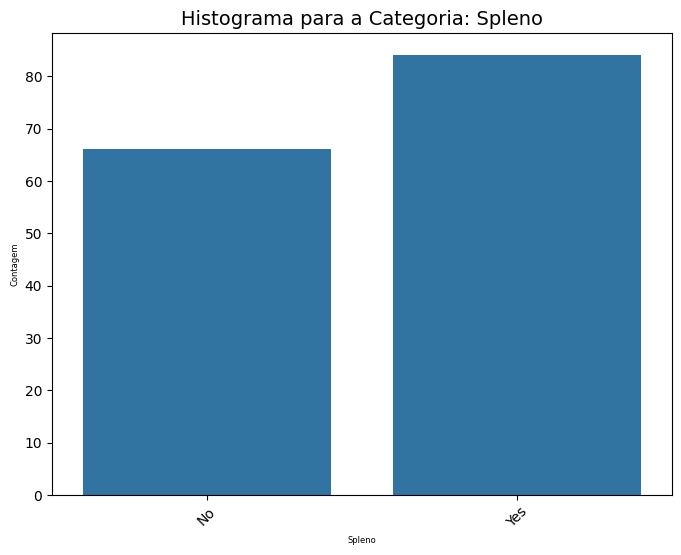

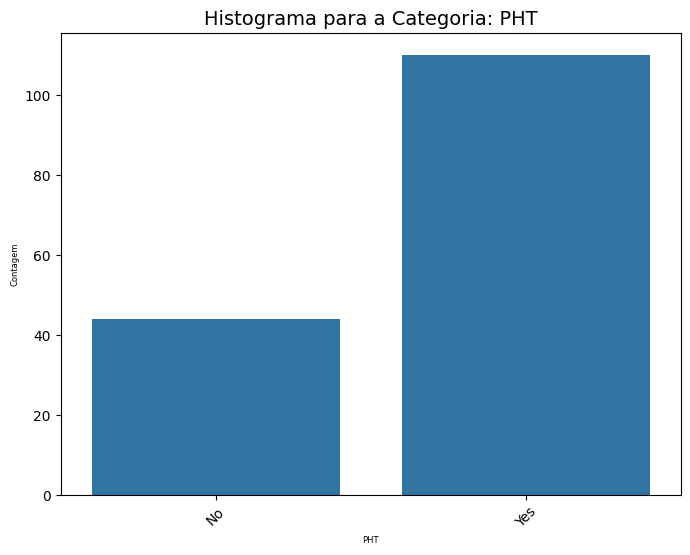

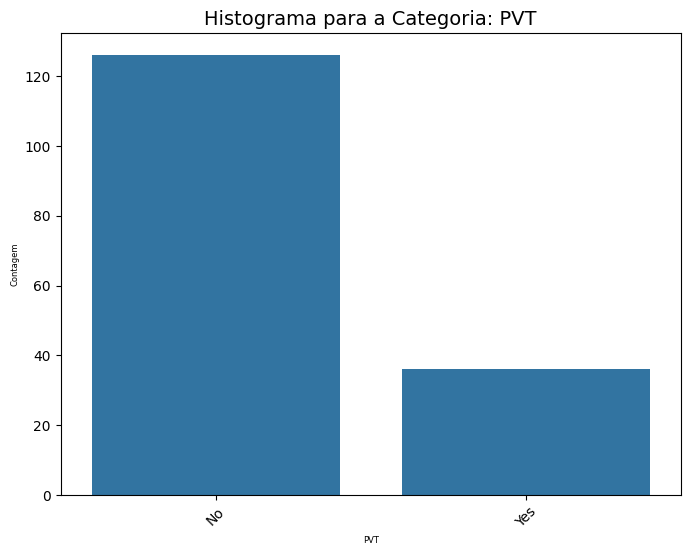

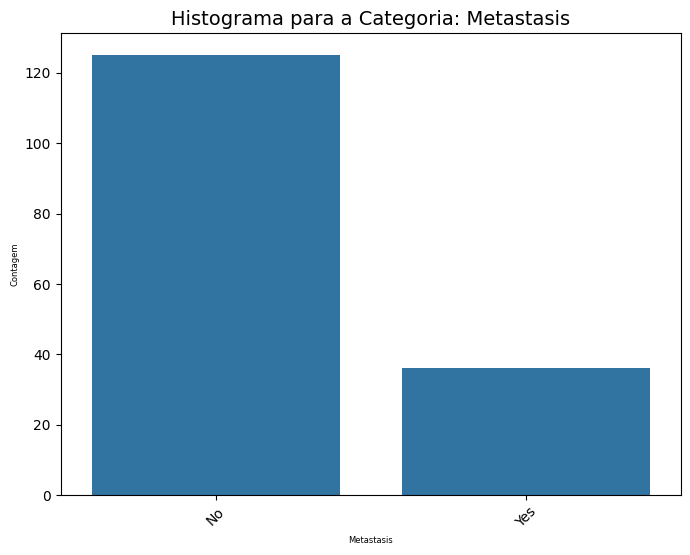

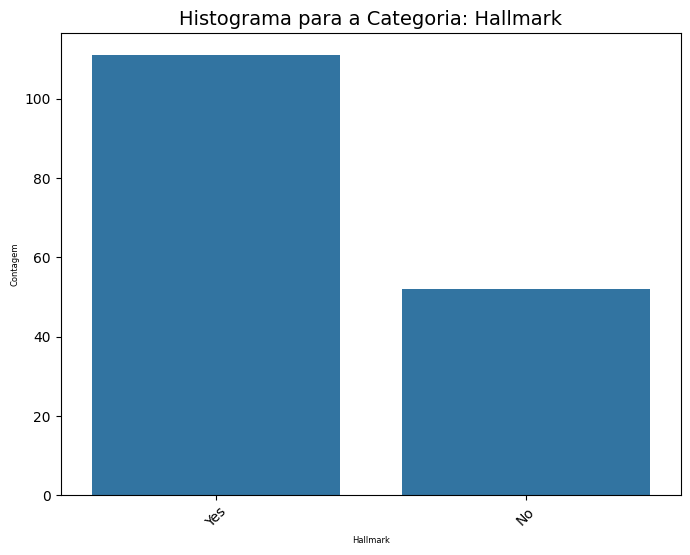

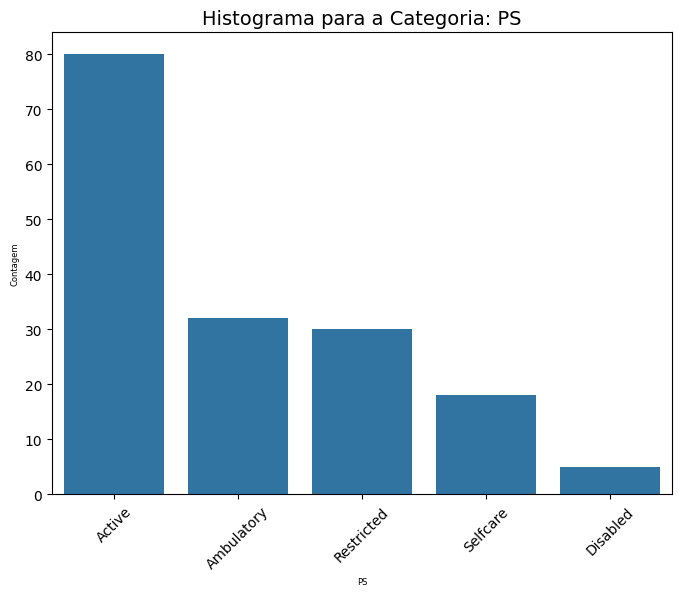

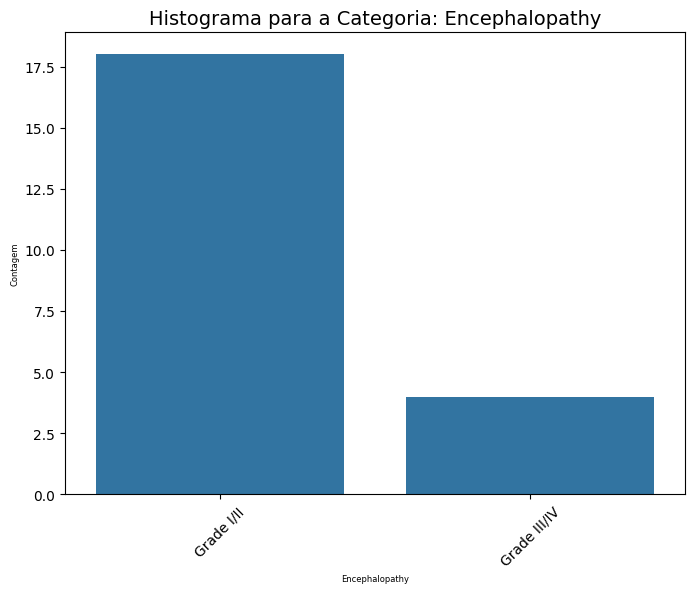

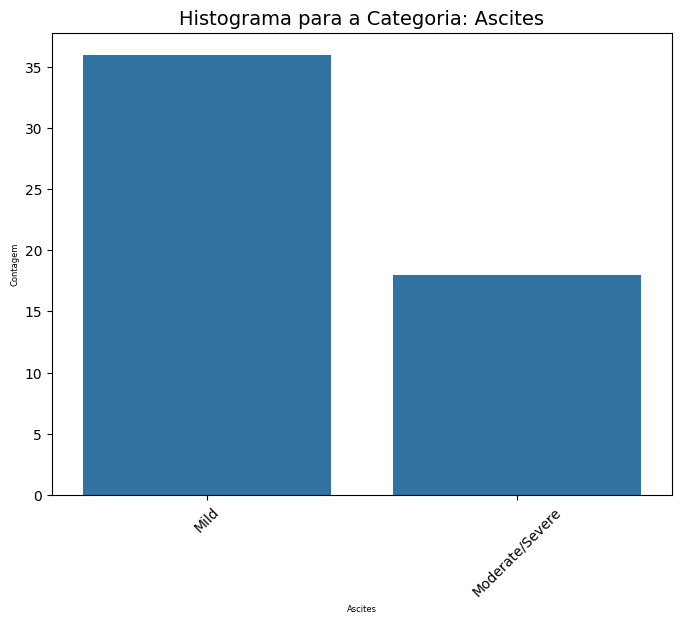

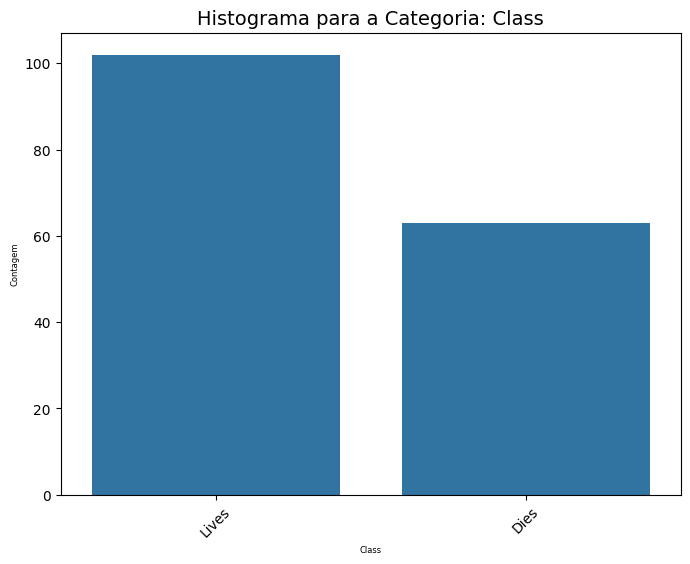

In [26]:
# 6. Histograma do ficheiro todo

print("6. Histogramas dos Pacientes:")
print('\n')
# os histogramas ajudam a identificar padroes
# Criar histograma para cada categoria
for coluna in lista_colunas:
    if df[coluna].dtype == 'object':  # Verifica se a coluna é categórica
        plt.figure(figsize=(8, 6))
        sns.countplot(x=coluna, data=df)
        plt.title(f'Histograma para a Categoria: {coluna}', fontsize=14)
        plt.xlabel(coluna, fontsize=6)
        plt.ylabel('Contagem', fontsize=6)
        plt.xticks(rotation=45)
        plt.show()

In [27]:
# 7. Doentes que irão morrer

# Criar um dicionário vazio para armazenar todos os dados dos pacientes que morreram
DADOS_PACIENTES_MORREM = {}

# Criar um dicionário para armazenar os dados dos pacientes com 'Class' igual a 'Dies'
dados_dies = {}

# Iterar sobre as linhas do DataFrame
for indice, linha in df.iterrows():
    # Verificar se a coluna 'Class' contém o valor 'Dies'
    if linha['Class'] == 'Dies':
        # Se sim, adicionar o número do paciente e suas características ao dicionário
        dados_dies[indice + 1] = linha[:-1].to_dict()  # índice começa em 0, então adicionamos 1
        
# Iterar sobre os pacientes que morreram e adicionar ao dicionário        
for indice, dados in dados_dies.items():
    DADOS_PACIENTES_MORREM[indice] = dados

# Exibir o dicionário de pacientes que morreram
print("7. Dados dos Pacientes que vão morrer:")
print('\n')

for doente, valores in DADOS_PACIENTES_MORREM.items():
    print(f'{doente}: {valores}')
    print('\n')

7. Dados dos Pacientes que vão morrer:


4: {'Gender': 'Male', 'Symptoms': 'Yes', 'Alcohol': 'Yes', 'HBsAg': 'No', 'HBeAg': 'No', 'HBcAb': 'No', 'HCVAb': 'No', 'Cirrhosis': 'Yes', 'Endemic': 'No', 'Smoking': 'Yes', 'Diabetes': 'Yes', 'Obesity': 'No', 'Hemochro': 'No', 'AHT': 'Yes', 'CRI': 'No', 'HIV': 'No', 'NASH': 'No', 'Varices': 'No', 'Spleno': 'No', 'PHT': 'No', 'PVT': 'No', 'Metastasis': 'Yes', 'Hallmark': 'Yes', 'Age': 77, 'Grams_day': 40.0, 'Packs_year': 30.0, 'PS': 'Active', 'Encephalopathy': nan, 'Ascites': nan, 'INR': 0.95, 'AFP': 2440.0, 'Hemoglobin': 13.4, 'MCV': 97.1, 'Leucocytes': 9.0, 'Platelets': 279.0, ' Albumin': 3.7, 'Total_Bil': 0.4, 'ALT': 16.0, 'AST': 64.0, 'GGT': 94.0, 'ALP': 174.0, 'TP': 8.1, 'Creatinine': 1.11, 'Nodules': 2.0, 'Major_Dim': 15.7, 'Dir_Bil': 0.2, 'Iron': nan, 'Sat': nan, 'Ferritin': nan}


6: {'Gender': 'Male', 'Symptoms': 'No', 'Alcohol': 'Yes', 'HBsAg': 'No', 'HBeAg': nan, 'HBcAb': 'No', 'HCVAb': 'No', 'Cirrhosis': 'Yes', 'Endemic': 'No', 'Smok

8. Histogramas das categorias dos pacientes que vão morrer:



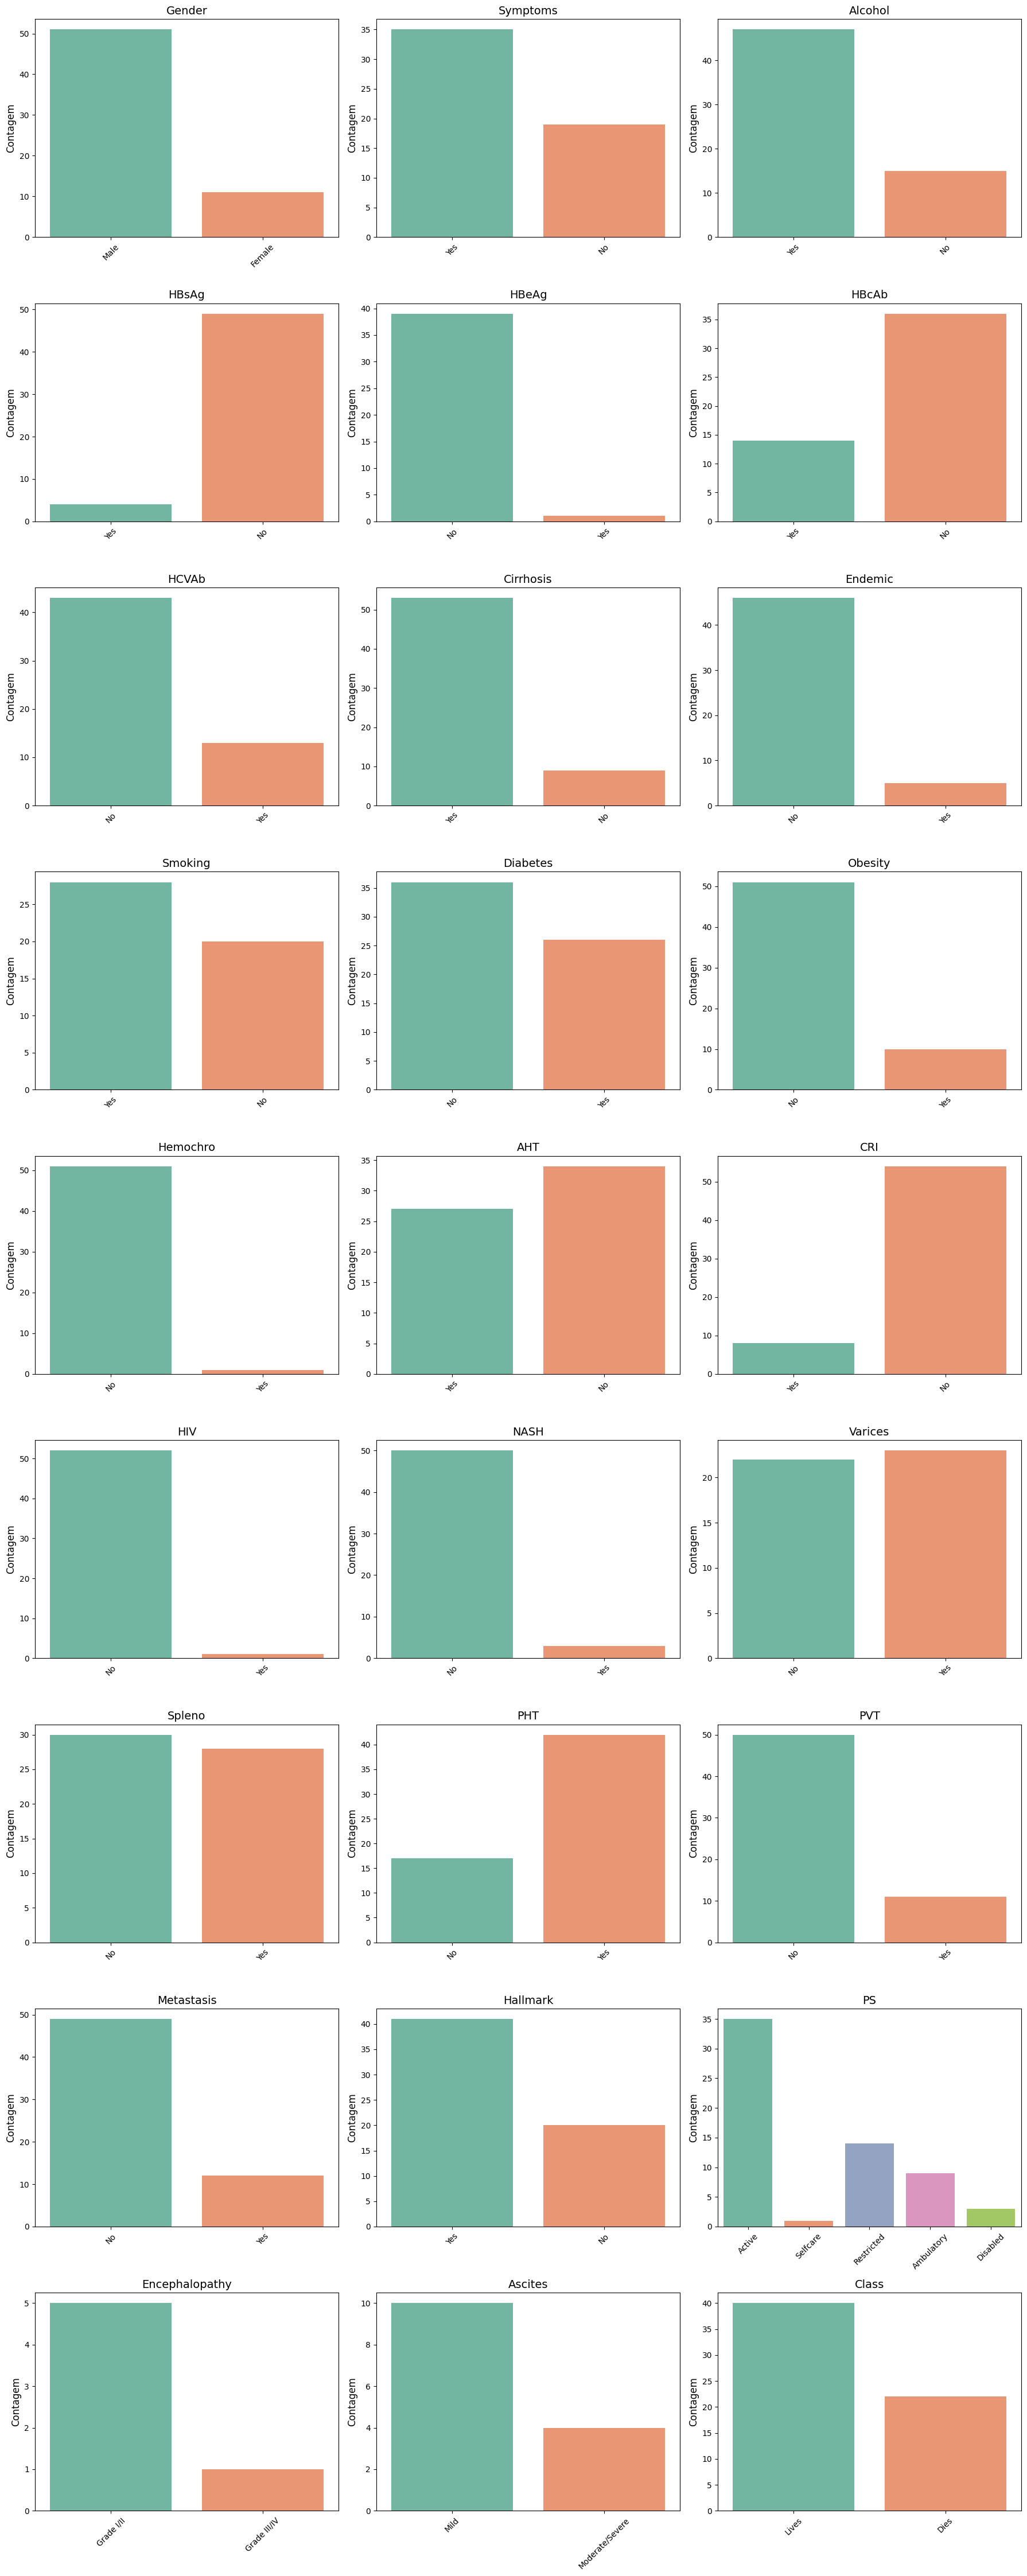

In [34]:
# 8. Histogramas dos pacientes que vão morrer
print("8. Histogramas das categorias dos pacientes que vão morrer:\n")

# Lista de colunas categóricas
colunas_categoricas = [col for col in lista_colunas if df[col].dtype == 'object']
num_colunas = len(colunas_categoricas)

# Número de colunas e linhas no grid
num_graficos_por_linha = 3
num_linhas = (num_colunas // num_graficos_por_linha) + (1 if num_colunas % num_graficos_por_linha != 0 else 0)

# Tamanho da figura geral (ajustado para ser maior)
plt.figure(figsize=(num_graficos_por_linha * 6, num_linhas * 5))

# Filtrar pacientes que morreram
df_morreram = df[df.index.isin(DADOS_PACIENTES_MORREM.keys())]

# Criar subgráficos
for i, coluna in enumerate(colunas_categoricas):
    ax = plt.subplot(num_linhas, num_graficos_por_linha, i + 1)
    sns.countplot(x=coluna, hue=coluna, data=df_morreram, palette='Set2', ax=ax, legend=False)
    ax.set_title(f'{coluna}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Contagem', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [35]:
# 9. Doentes que vão sobreviver

# Criar um dicionário vazio para armazenar todos os dados dos pacientes que sobreviveram
DADOS_PACIENTES_SOBR = {}

# Criar um dicionário para armazenar os dados dos pacientes com 'Class' igual a 'Lives'
dados_lives = {}

# Iterar sobre as linhas do DataFrame
for indice, linha in df.iterrows():
    # Verificar se a coluna 'Class' contém o valor 'Lives'
    if linha['Class'] == 'Lives':
        # Se sim, adicionar o número do paciente e suas características ao dicionário
        dados_lives[indice + 1] = linha[:-1].to_dict()  # índice começa em 0, então adicionamos 1
        
# Iterar sobre os pacientes que sobreviveram e adicionar ao dicionário        
for indice, dados in dados_lives.items():
    DADOS_PACIENTES_SOBR[indice] = dados

# Exibir o dicionário de pacientes que sobreviveram
print("9. Dados dos Pacientes que Sobreviveram:")
print('\n')

for doente, valores in DADOS_PACIENTES_SOBR.items():
    print(f'{doente}: {valores}')
    print('\n')

9. Dados dos Pacientes que Sobreviveram:


1: {'Gender': 'Male', 'Symptoms': 'No', 'Alcohol': 'Yes', 'HBsAg': 'No', 'HBeAg': 'No', 'HBcAb': 'No', 'HCVAb': 'No', 'Cirrhosis': 'Yes', 'Endemic': 'No', 'Smoking': 'Yes', 'Diabetes': 'Yes', 'Obesity': nan, 'Hemochro': 'Yes', 'AHT': 'No', 'CRI': 'No', 'HIV': 'No', 'NASH': 'No', 'Varices': 'Yes', 'Spleno': 'No', 'PHT': 'No', 'PVT': 'No', 'Metastasis': 'No', 'Hallmark': 'Yes', 'Age': 67, 'Grams_day': 137.0, 'Packs_year': 15.0, 'PS': 'Active', 'Encephalopathy': nan, 'Ascites': nan, 'INR': 1.53, 'AFP': 95.0, 'Hemoglobin': 13.7, 'MCV': 106.6, 'Leucocytes': 4.9, 'Platelets': 99.0, ' Albumin': 3.4, 'Total_Bil': 2.1, 'ALT': 34.0, 'AST': 41.0, 'GGT': 183.0, 'ALP': 150.0, 'TP': 7.1, 'Creatinine': 0.7, 'Nodules': 1.0, 'Major_Dim': 3.5, 'Dir_Bil': 0.5, 'Iron': nan, 'Sat': nan, 'Ferritin': nan}


2: {'Gender': 'Female', 'Symptoms': nan, 'Alcohol': 'No', 'HBsAg': 'No', 'HBeAg': 'No', 'HBcAb': 'No', 'HCVAb': 'Yes', 'Cirrhosis': 'Yes', 'Endemic': nan, 'Smoki

10. Histogramas das categorias dos Pacientes que Sobrevivem:



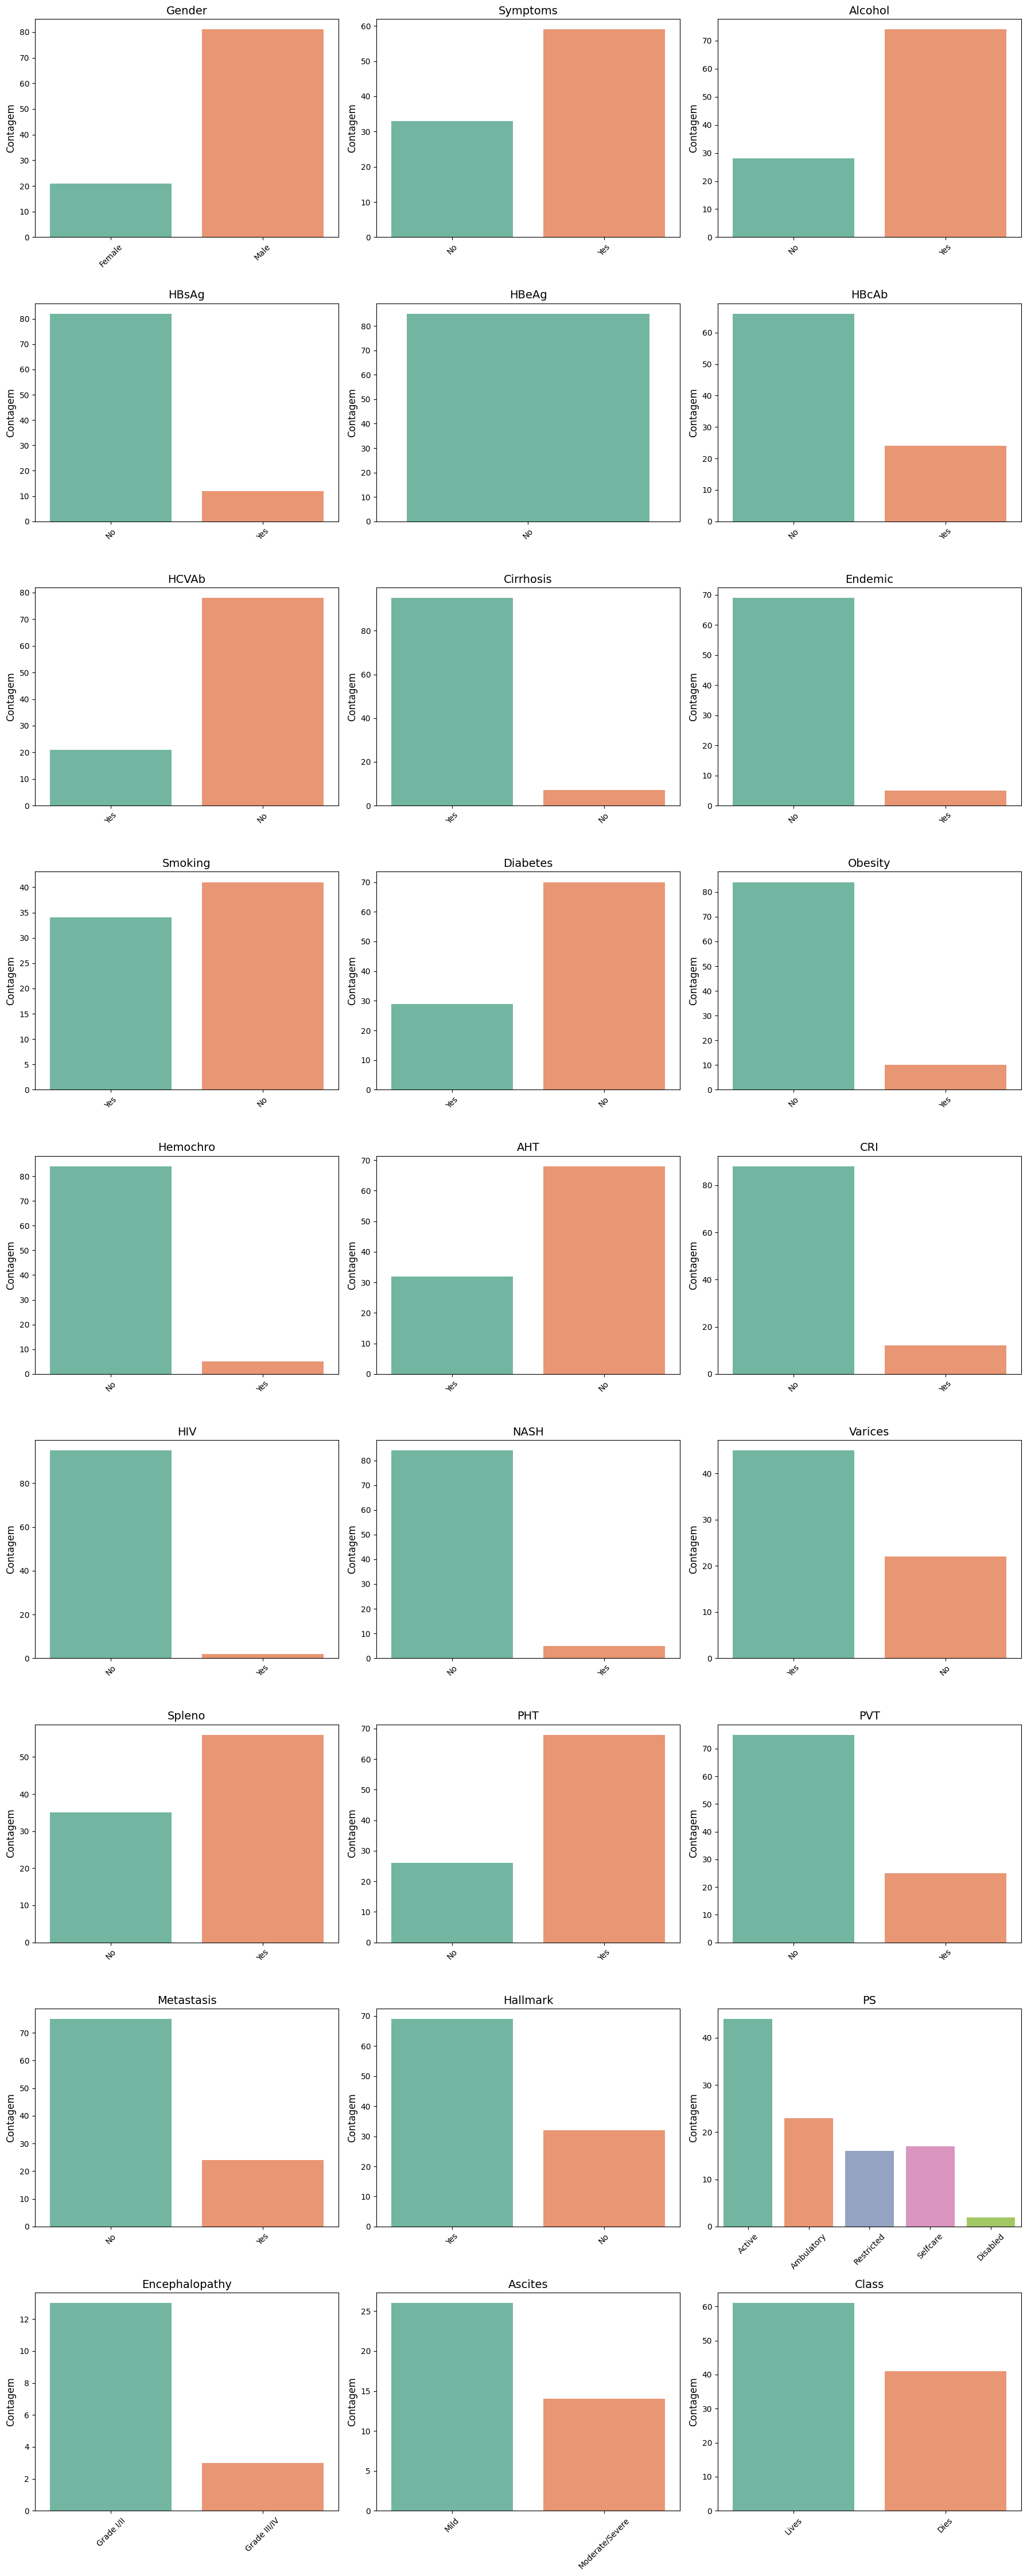

In [37]:
# 10. Histogramas dos Pacientes que Sobrevivem
print("10. Histogramas das categorias dos Pacientes que Sobrevivem:\n")

# Lista de colunas categóricas
colunas_categoricas = [col for col in lista_colunas if df[col].dtype == 'object']
num_colunas = len(colunas_categoricas)

# Número de colunas e linhas no grid
num_graficos_por_linha = 3
num_linhas = (num_colunas // num_graficos_por_linha) + (1 if num_colunas % num_graficos_por_linha != 0 else 0)

# Tamanho da figura geral
plt.figure(figsize=(num_graficos_por_linha * 6, num_linhas * 5))

# Filtrar pacientes que sobreviveram
df_sobrevivem = df[df.index.isin(DADOS_PACIENTES_SOBR.keys())]

# Criar subgráficos
for i, coluna in enumerate(colunas_categoricas):
    ax = plt.subplot(num_linhas, num_graficos_por_linha, i + 1)
    sns.countplot(x=coluna, hue=coluna, data=df_sobrevivem, palette='Set2', ax=ax, legend=False)
    ax.set_title(f'{coluna}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Contagem', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
